<a href="https://colab.research.google.com/github/shahdcode/Credit-Card-Approval-Prediction/blob/main/application_record_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Before Building Machine Learning Model
## Steps:




### **1) Explore application_record dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
application_record = pd.read_csv('/content/drive/MyDrive/application_record.csv')
print('Data Head')
application_record.head()  # First few rows

Data Head


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
print('Data Tail')
application_record.tail() # Number of rows and columns

Data Tail


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


In [6]:
print('Data Information')
application_record.info()  # Column types and non-null counts

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  

In [7]:
print(f"Dataset contains {application_record.shape[0]} rows and {application_record.shape[1]} columns.")


Dataset contains 438557 rows and 18 columns.


### **2) Descriptive Statistics**:

In [ ]:
# Summarize numeric columns:
application_record.describe(include = "object")

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [ ]:
#Summarize categorical columns:
for col in application_record.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{application_record[col].value_counts()}\n")


Value counts for CODE_GENDER:
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64

Value counts for FLAG_OWN_CAR:
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64

Value counts for FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64

Value counts for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64

Value counts for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64

Value counts for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow       

### **3) Visualize Data Distribution**

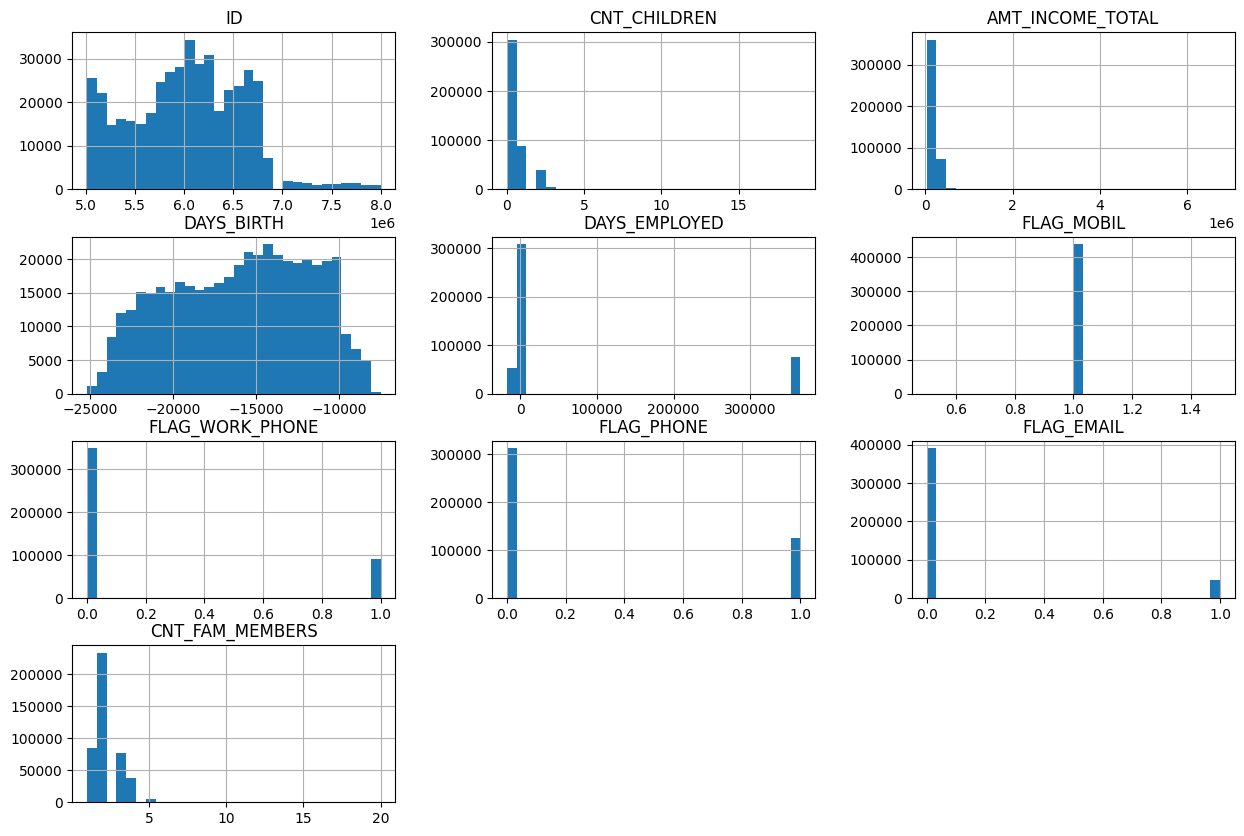

In [ ]:
# Visualize numeric columns:
application_record.hist(bins=30, figsize=(15, 10))
plt.show()

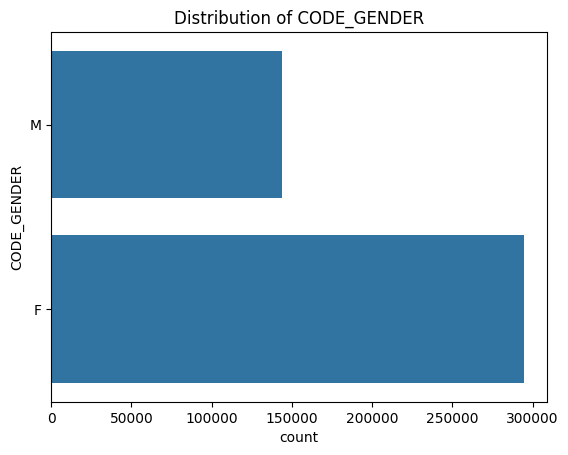

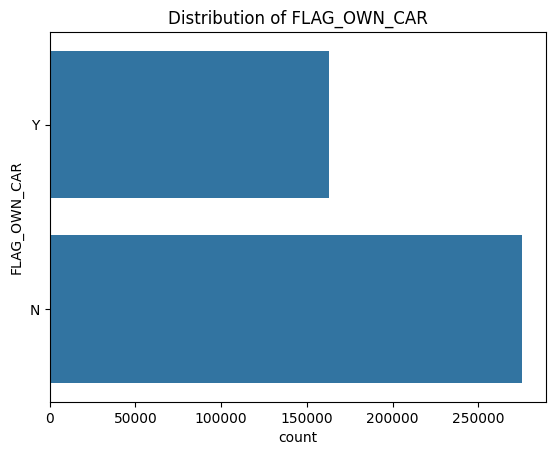

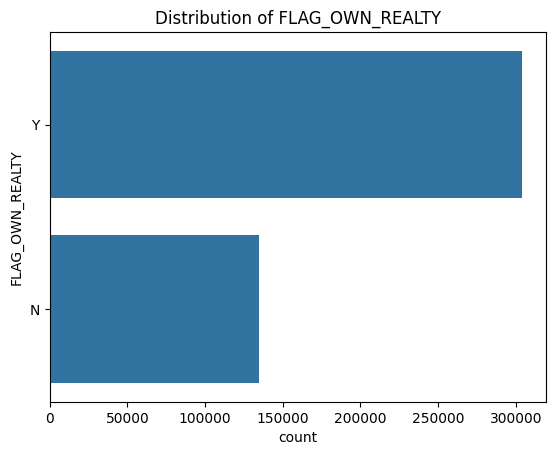

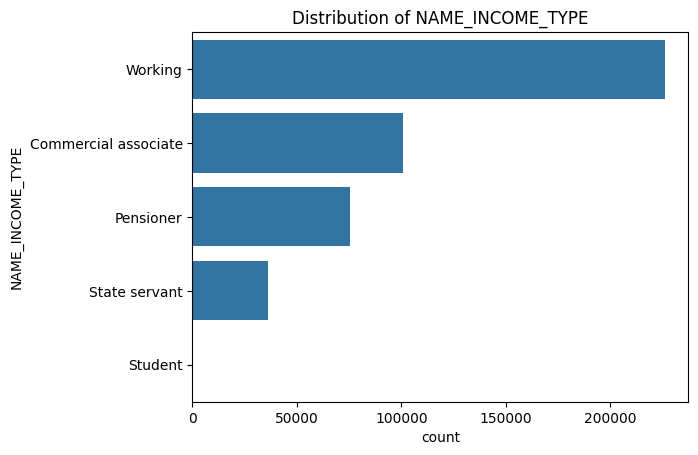

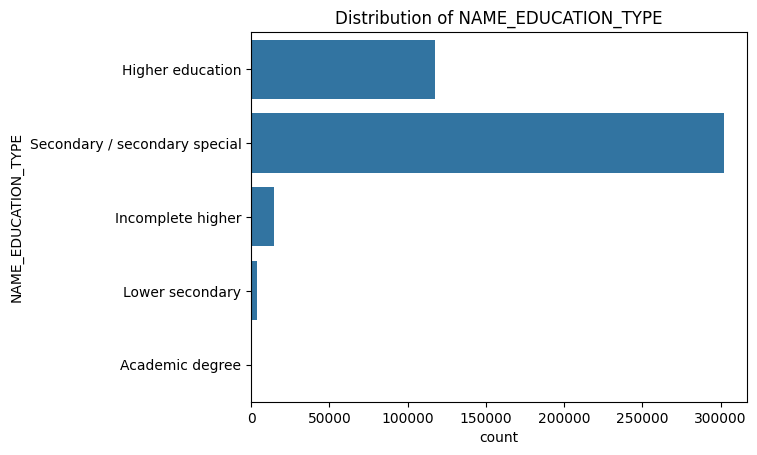

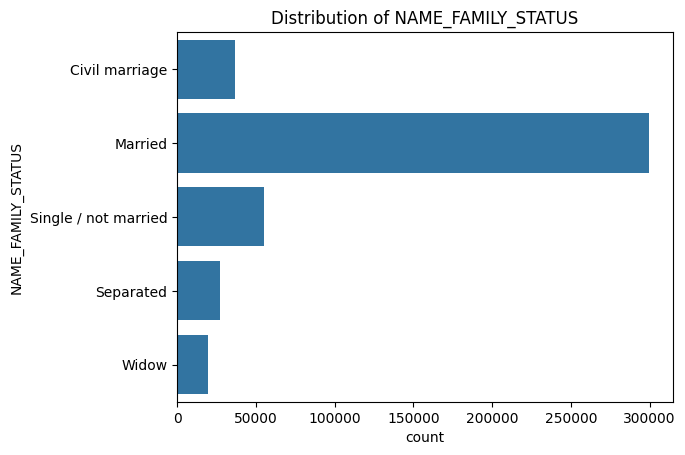

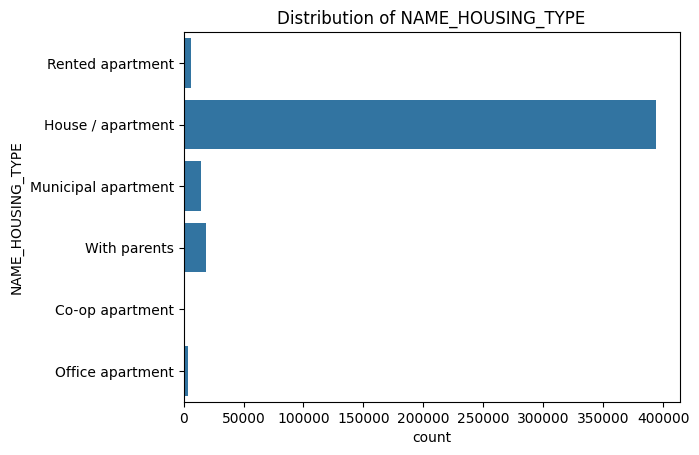

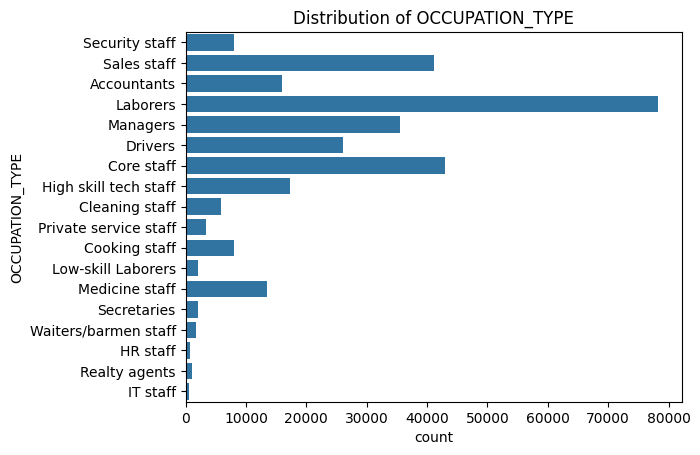

In [ ]:
# Visualize categorical data:
categorical_columns = application_record.select_dtypes(include='object').columns
for col in categorical_columns:
    sns.countplot(y=col, data=application_record)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Check relationships between variables using scatter plot
numeric_columns = application_record.select_dtypes(include = "number").columns
# Check if 'Application Record' is in numeric_columns before dropping
if 'Application Record' in numeric_columns:
    numeric_columns = numeric_columns.drop('Application Record')
print(numeric_columns)
print(application_record.shape)

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')
(438557, 18)


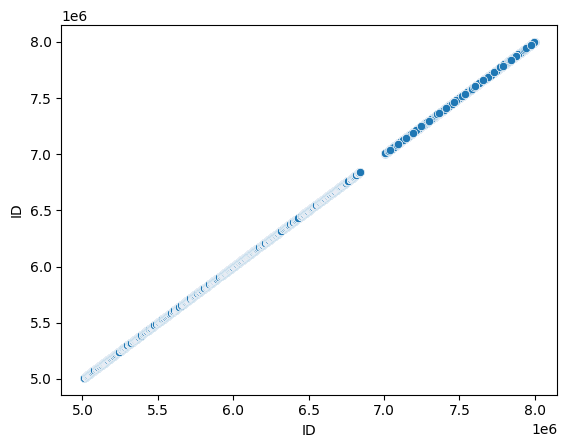

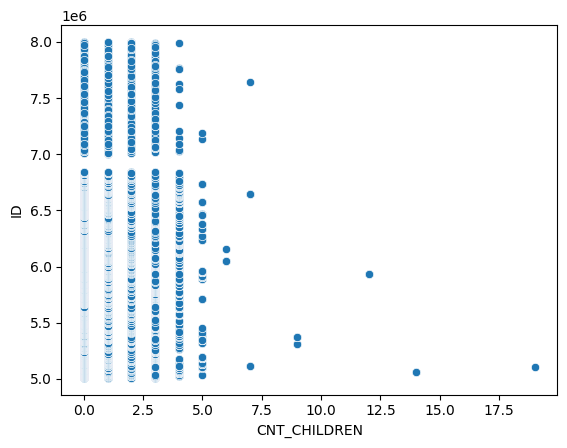

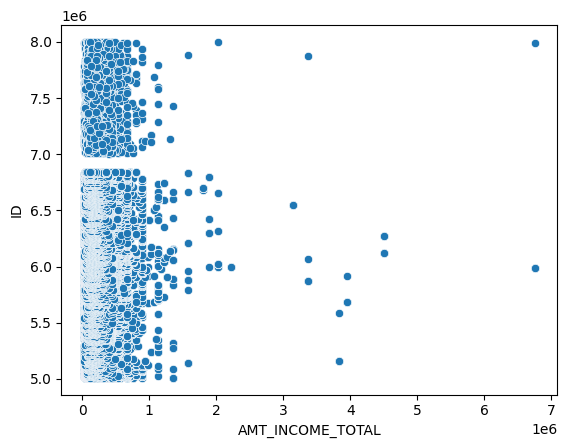

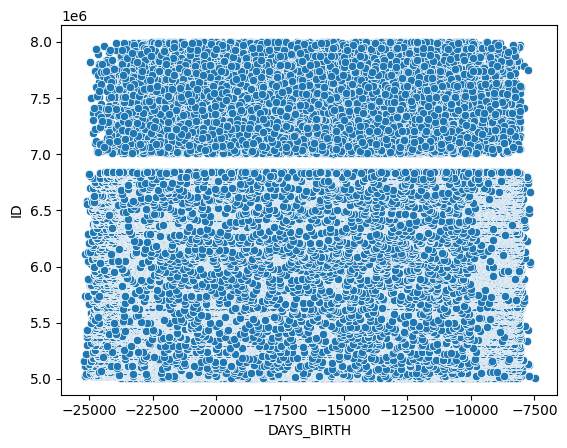

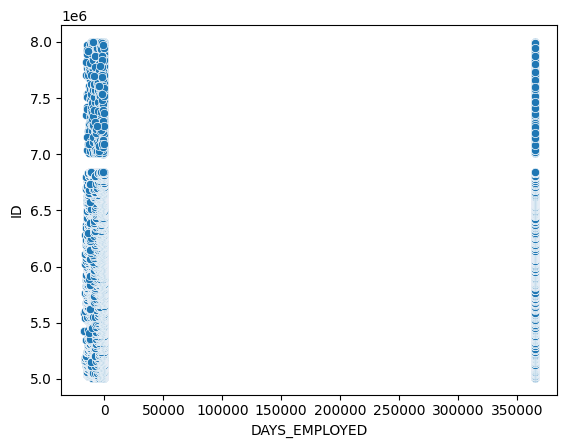

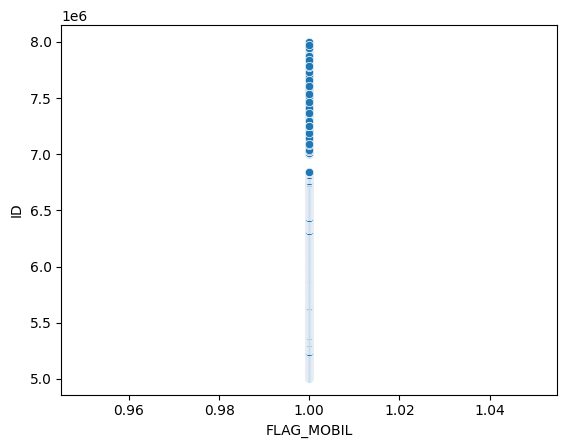

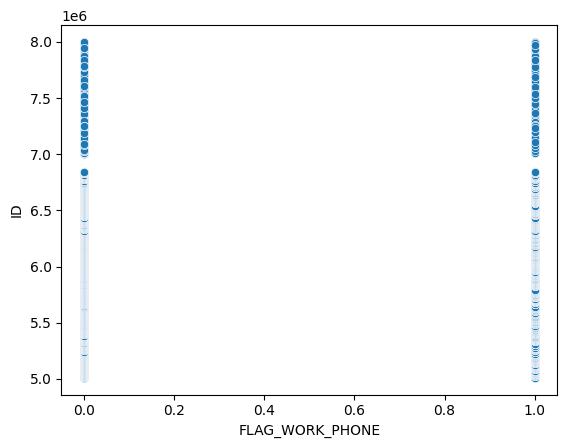

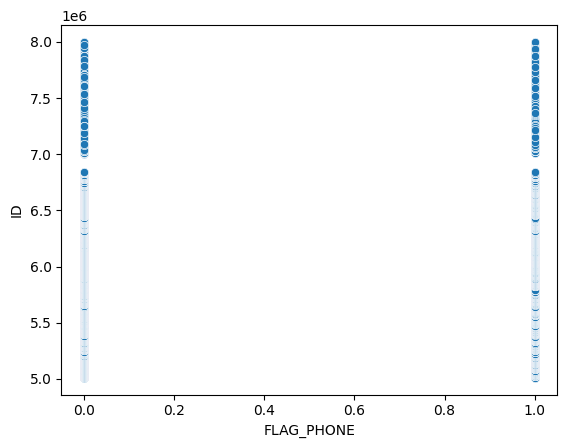

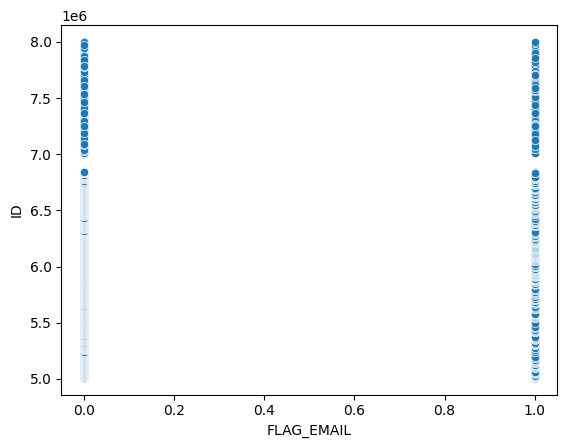

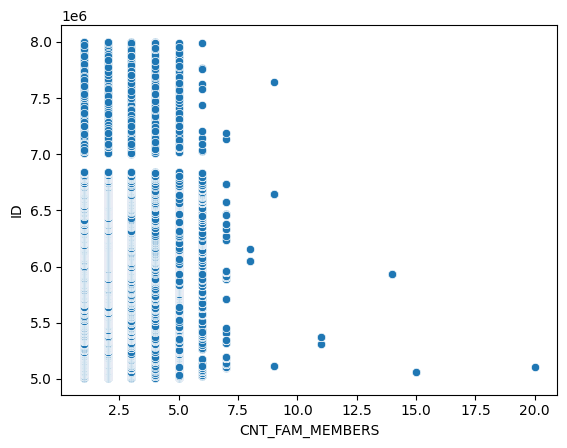

In [ ]:
for i in numeric_columns:
  sns.scatterplot(data=application_record, x =i,y = 'ID')
  plt.show()

### **4) Identify Initial issues**:


In [9]:
#identifying garbage values
for i in application_record.select_dtypes(include = "object").columns:
  print(application_record[i].value_counts())
  print("****"*10)


CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
****************************************
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
****************************************
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
****************************************
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64
****************************************
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
****************************************
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow            

In [ ]:
# Check for missing values:
application_record.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
# Find duplicates:
print(f"Number of duplicate rows: {application_record.duplicated().sum()}")

Number of duplicate rows: 0


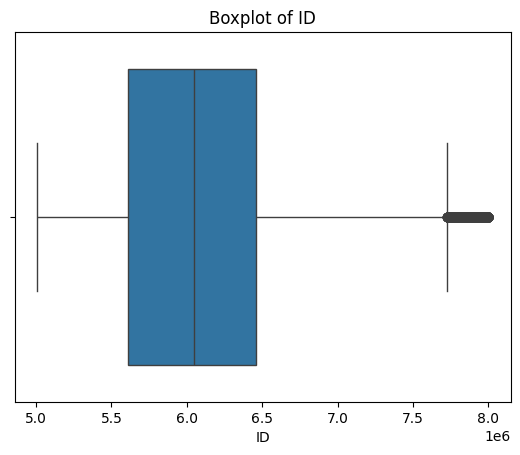

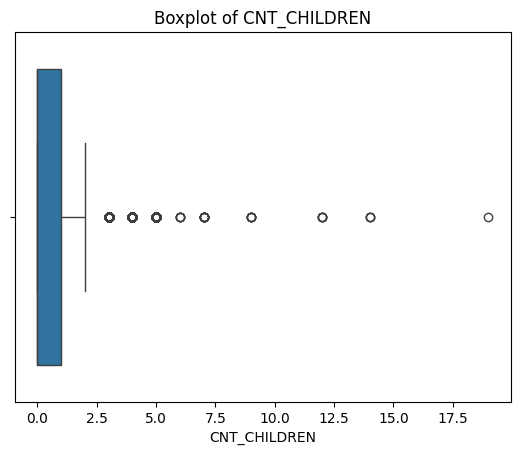

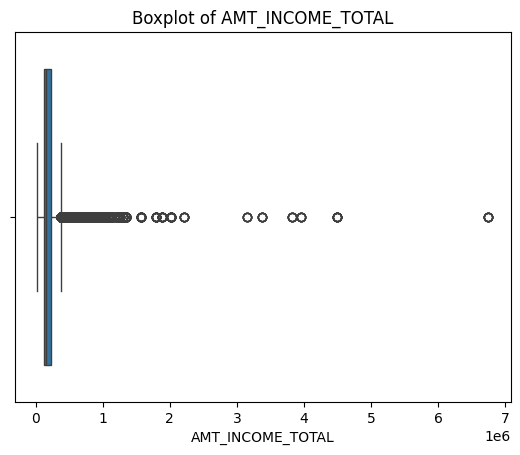

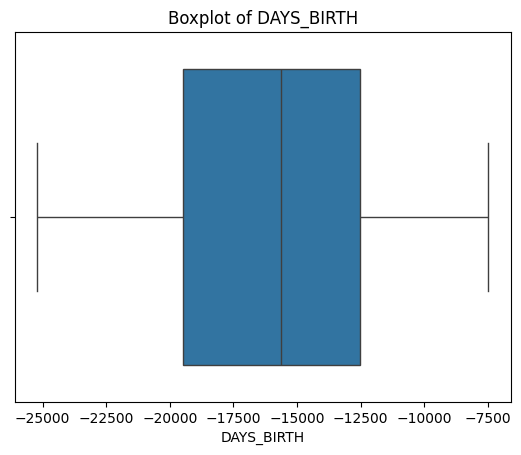

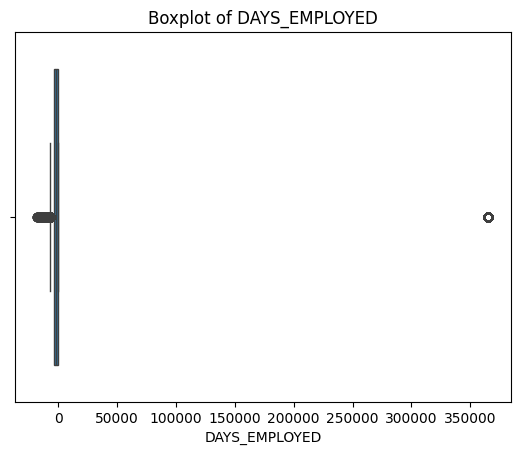

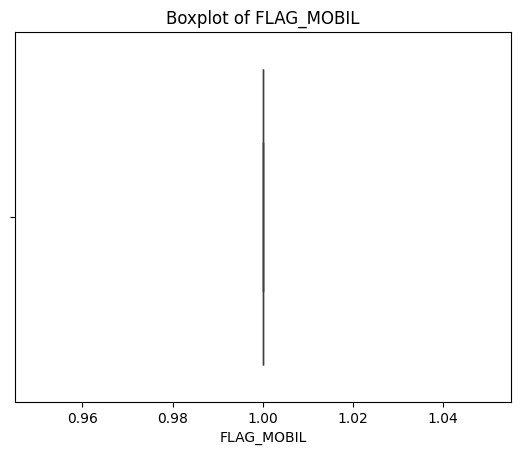

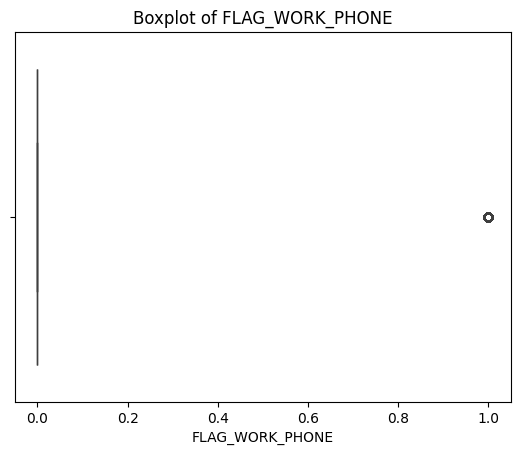

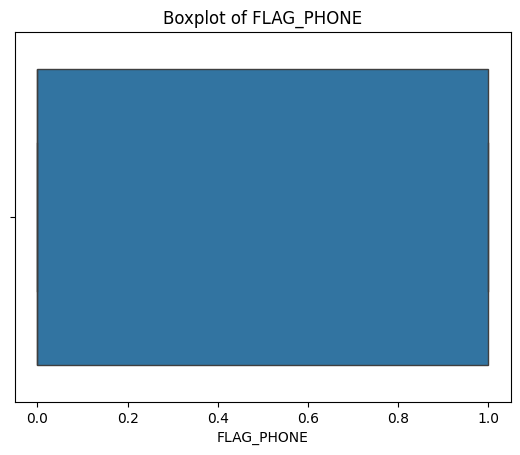

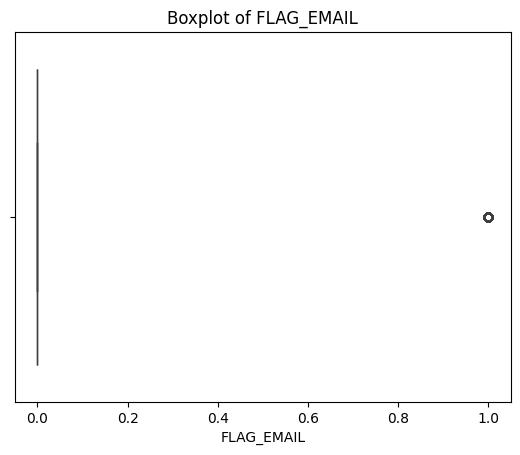

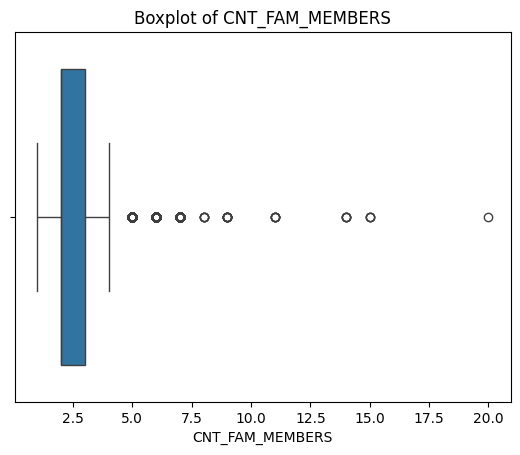

In [ ]:
# Look for outliers:
for col in application_record.select_dtypes(include='number').columns:
    sns.boxplot(x=application_record[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### **5) Handle Missing Values**:



In [ ]:
# Drop columns with excessive missing values:
data = application_record.dropna(thresh=len(application_record) * 0.6, axis=1)  # Keep columns with >60% non-missing values


In [ ]:
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0])


### **6) Correct Obvious Errors**:


In [21]:
numeric_columns = application_record.select_dtypes(include='number').columns
min_values = application_record[numeric_columns].min()
max_values = application_record[numeric_columns].max()

print(f"{'Column':<20} {'Min':<10} {'Max':<10}")
print("-" * 40)
for col in numeric_columns:
    print(f"{col:<20} {min_values[col]:<10} {max_values[col]:<10}")

Column               Min        Max       
----------------------------------------
ID                   5008804.0  7999952.0 
CNT_CHILDREN         0.0        19.0      
AMT_INCOME_TOTAL     26100.0    6750000.0 
DAYS_BIRTH           -25201.0   -7489.0   
DAYS_EMPLOYED        -17531.0   365243.0  
FLAG_MOBIL           1.0        1.0       
FLAG_WORK_PHONE      0.0        1.0       
FLAG_PHONE           0.0        1.0       
FLAG_EMAIL           0.0        1.0       
CNT_FAM_MEMBERS      1.0        20.0      


In [ ]:
# Step 2: Correct obvious errors in numeric columns, such as negative or out-of-range values
# For example, correcting 'CNT_CHILDREN' to be non-negative and within a reasonable range
data['CNT_CHILDREN'] = data['CNT_CHILDREN'].apply(lambda x: max(x, 0))

# Step 3: Ensure 'CNT_FAM_MEMBERS' is consistent with 'CNT_CHILDREN' (at least 1 more than children)
data['CNT_FAM_MEMBERS'] = data[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].max(axis=1)

# Step 4: Correct unrealistic income values
# Assuming an income below 1000 or excessively high values (e.g., > 1,000,000) are errors
data['AMT_INCOME_TOTAL'] = data['AMT_INCOME_TOTAL'].clip(lower=1000, upper=1000000)

# Step 5: Handle invalid categorical entries if any (e.g., 'X' for gender)
if 'CODE_GENDER' in data.columns:
    data = data[data['CODE_GENDER'].isin(['M', 'F'])]

# Displaying updated data summary
data_info = data.info()
data_describe = data.describe()
data_info, data_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

(None,
                  ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
 count  4.385570e+05  438557.000000     438557.000000  438557.000000   
 mean   6.022176e+06       0.427390     186930.234577  -15997.904649   
 std    5.716370e+05       0.724882      99034.808831    4185.030007   
 min    5.008804e+06       0.000000      26100.000000  -25201.000000   
 25%    5.609375e+06       0.000000     121500.000000  -19483.000000   
 50%    6.047745e+06       0.000000     160780.500000  -15630.000000   
 75%    6.456971e+06       1.000000     225000.000000  -12514.000000   
 max    7.999952e+06      19.000000    1000000.000000   -7489.000000   
 
        DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
 count  438557.000000    438557.0    438557.000000  438557.000000   
 mean    60563.675328         1.0         0.206133       0.287771   
 std    138767.799647         0.0         0.404527       0.452724   
 min    -17531.000000         1.0         0.000000       0.000000  

In [22]:
numeric_columns = application_record.select_dtypes(include='number').columns
min_values = application_record[numeric_columns].min()
max_values = application_record[numeric_columns].max()

print(f"{'Column':<20} {'Min':<10} {'Max':<10}")
print("-" * 40)
for col in numeric_columns:
    print(f"{col:<20} {min_values[col]:<10} {max_values[col]:<10}")

Column               Min        Max       
----------------------------------------
ID                   5008804.0  7999952.0 
CNT_CHILDREN         0.0        19.0      
AMT_INCOME_TOTAL     26100.0    6750000.0 
DAYS_BIRTH           -25201.0   -7489.0   
DAYS_EMPLOYED        -17531.0   365243.0  
FLAG_MOBIL           1.0        1.0       
FLAG_WORK_PHONE      0.0        1.0       
FLAG_PHONE           0.0        1.0       
FLAG_EMAIL           0.0        1.0       
CNT_FAM_MEMBERS      1.0        20.0      


In [ ]:
# check after cleaining data
data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
data.to_csv('application_record_cleaned.csv', index=False)
files.download('application_record_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>